In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [26]:
base = pd.read_csv('../Bases/Criados/4_base_preenchida.csv')

##### Quantidade de instâncias de cada classe

In [27]:
np.unique(base['Q06306'], return_counts=True)

(array([1., 2.]), array([ 1153, 19341]))

<Axes: xlabel='Q06306', ylabel='count'>

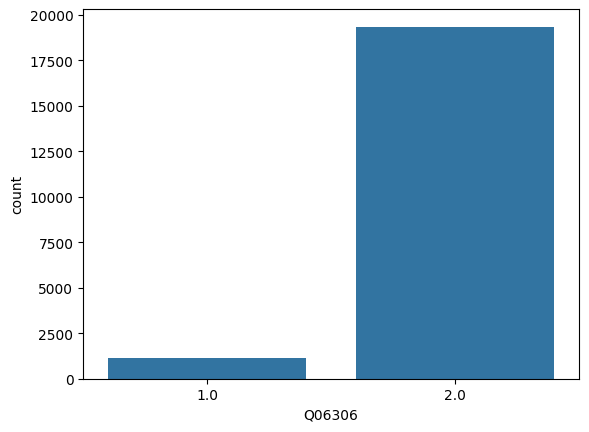

In [28]:
sns.countplot(x = base['Q06306'])

### **Tratamento de dados categóricos**

In [29]:
string_columns = base.select_dtypes(include='object').columns

print("Colunas com valores string:")
print(string_columns)

Colunas com valores string:
Index(['C009', 'Mobilidade_assistida', 'Dor_peito'], dtype='object')


### Label Encoding (Transforma cada categoria em um número inteiro)

C009, Mobilidade_assistida

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
cols_label_encode = ['C009', 'Mobilidade_assistida']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

### OneHotEncoder (Cria uma nova coluna binária (0 ou 1) para cada categoria.)

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [33]:
print(base["Dor_peito"].unique())

['Não sente dor' 'Acima ou meio do peito' 'Braço esquerdo'
 'Abaixo do peito' 'Outro lugar']


In [34]:
cols_onehot_encode = ['Dor_peito']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)

In [35]:
base = base.drop('Dor_peito', axis=1)

In [36]:
base_encoded

,Dor_peito_Abaixo do peito,Dor_peito_Acima ou meio do peito,Dor_peito_Braço esquerdo,Dor_peito_Não sente dor,Dor_peito_Outro lugar,V0001,V0026,V0031,B001,C006,...,Exposicao_ruido,Exposicao_lixo,Exposicao_minerio,Atividade_fisica_semanal,Inicio_tabagismo,Tempo_parou_fumar,Intensidade_fumo,Consumo_alcool,Faixa_imc,Doenca_limitante
0,0.0,0.0,0.0,1.0,0.0,21,1,1,2.0,2.0,...,2,2,2,0,0,0,0,0,3,1.0
1,0.0,0.0,0.0,1.0,0.0,21,1,1,2.0,2.0,...,2,2,2,2,0,3,0,3,3,2.0
2,0.0,0.0,0.0,1.0,0.0,21,1,1,2.0,1.0,...,2,2,2,0,1,3,0,2,2,2.0
3,0.0,0.0,0.0,1.0,0.0,21,1,1,2.0,2.0,...,2,2,2,3,0,0,0,0,2,2.0
4,0.0,0.0,0.0,1.0,0.0,21,1,1,2.0,2.0,...,2,2,2,2,0,0,0,0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20489,0.0,1.0,0.0,0.0,0.0,53,2,1,2.0,2.0,...,2,2,2,0,0,0,0,2,1,1.0
20490,0.0,0.0,0.0,1.0,0.0,53,2,1,2.0,1.0,...,2,2,2,0,0,0,0,0,1,2.0
20491,0.0,0.0,0.0,1.0,0.0,53,2,1,2.0,2.0,...,1,2,2,0,2,1,2,1,1,1.0
20492,0.0,0.0,0.0,1.0,0.0,53,2,1,3.0,1.0,...,1,1,2,0,3,1,2,3,2,0.0


In [37]:
string_columns = base.select_dtypes(include='object').columns

print("Colunas com valores string:")
print(string_columns)

Colunas com valores string:
Index([], dtype='object')


In [38]:
base.to_csv('../Bases/Criados/5_base_codificada.csv', index=False)

### **Separação do dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [39]:
X_prev = base_encoded.drop(columns=['Q06306'])  # Todas as colunas exceto a target
y_classe = base_encoded['Q06306']               # A coluna target

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_prev

,Dor_peito_Abaixo do peito,Dor_peito_Acima ou meio do peito,Dor_peito_Braço esquerdo,Dor_peito_Não sente dor,Dor_peito_Outro lugar,V0001,V0026,V0031,B001,C006,...,Exposicao_ruido,Exposicao_lixo,Exposicao_minerio,Atividade_fisica_semanal,Inicio_tabagismo,Tempo_parou_fumar,Intensidade_fumo,Consumo_alcool,Faixa_imc,Doenca_limitante
0,0.0,0.0,0.0,1.0,0.0,21,1,1,2.0,2.0,...,2,2,2,0,0,0,0,0,3,1.0
1,0.0,0.0,0.0,1.0,0.0,21,1,1,2.0,2.0,...,2,2,2,2,0,3,0,3,3,2.0
2,0.0,0.0,0.0,1.0,0.0,21,1,1,2.0,1.0,...,2,2,2,0,1,3,0,2,2,2.0
3,0.0,0.0,0.0,1.0,0.0,21,1,1,2.0,2.0,...,2,2,2,3,0,0,0,0,2,2.0
4,0.0,0.0,0.0,1.0,0.0,21,1,1,2.0,2.0,...,2,2,2,2,0,0,0,0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20489,0.0,1.0,0.0,0.0,0.0,53,2,1,2.0,2.0,...,2,2,2,0,0,0,0,2,1,1.0
20490,0.0,0.0,0.0,1.0,0.0,53,2,1,2.0,1.0,...,2,2,2,0,0,0,0,0,1,2.0
20491,0.0,0.0,0.0,1.0,0.0,53,2,1,2.0,2.0,...,1,2,2,0,2,1,2,1,1,1.0
20492,0.0,0.0,0.0,1.0,0.0,53,2,1,3.0,1.0,...,1,1,2,0,3,1,2,3,2,0.0


In [42]:
y_classe

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
20489    2.0
20490    2.0
20491    2.0
20492    2.0
20493    2.0
Name: Q06306, Length: 20494, dtype: float64

In [43]:
y_classe.shape

(20494,)

In [44]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [45]:
X_treino.shape

(16395, 68)

In [46]:
X_teste.shape

(4099, 68)

In [47]:
X_teste

,Dor_peito_Abaixo do peito,Dor_peito_Acima ou meio do peito,Dor_peito_Braço esquerdo,Dor_peito_Não sente dor,Dor_peito_Outro lugar,V0001,V0026,V0031,B001,C006,...,Exposicao_ruido,Exposicao_lixo,Exposicao_minerio,Atividade_fisica_semanal,Inicio_tabagismo,Tempo_parou_fumar,Intensidade_fumo,Consumo_alcool,Faixa_imc,Doenca_limitante
6187,1.0,0.0,0.0,0.0,0.0,24,2,2,2.0,1.0,...,2,2,2,0,0,0,0,0,1,1.0
17158,0.0,0.0,0.0,1.0,0.0,51,1,2,1.0,1.0,...,2,2,2,0,0,0,0,0,1,0.0
13292,0.0,0.0,0.0,1.0,0.0,28,2,4,1.0,1.0,...,2,2,2,0,1,3,0,0,1,1.0
11378,0.0,0.0,0.0,1.0,0.0,27,1,4,1.0,2.0,...,2,1,1,0,0,0,0,0,3,2.0
2235,0.0,0.0,0.0,1.0,0.0,22,1,1,1.0,2.0,...,2,2,2,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,0.0,0.0,0.0,1.0,0.0,52,1,4,1.0,2.0,...,2,2,2,2,0,0,0,0,1,0.0
907,0.0,0.0,0.0,1.0,0.0,21,2,4,1.0,1.0,...,1,2,1,1,0,0,0,2,2,0.0
1576,0.0,0.0,0.0,1.0,0.0,21,1,4,1.0,1.0,...,2,2,2,2,0,0,0,0,1,2.0
11135,0.0,0.0,0.0,1.0,0.0,27,1,1,2.0,2.0,...,2,2,2,0,0,0,0,0,2,1.0


In [48]:
y_treino

7752     2.0
13285    2.0
14112    1.0
15618    2.0
9872     2.0
        ... 
11284    1.0
11964    2.0
5390     2.0
860      2.0
15795    1.0
Name: Q06306, Length: 16395, dtype: float64

In [49]:
y_teste

6187     2.0
17158    2.0
13292    2.0
11378    2.0
2235     2.0
        ... 
19185    2.0
907      2.0
1576     2.0
11135    2.0
10008    2.0
Name: Q06306, Length: 4099, dtype: float64